In [2]:
import random as r
import time
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Exo 1

In [3]:

def liste_aleatoire(n,v_min,v_max):
    return [r.randint(v_min,v_max) for i in range(n)]

In [4]:
liste_aleatoire(10,2,4)

[3, 3, 4, 4, 3, 4, 2, 4, 4, 4]

# Exo 2

In [5]:
def tri_insertion(L,h = 1):
    for i in range(len(L)):
        elem = L[i]
        
        # décaller ou pas sur [0..1]
        j = i
        while j>=1 and L[j-h]>elem:
            L[j] = L[j-h]
            j-=h
        # mettre elem dans le trou
        L[j] = elem
    return L

In [6]:
L = liste_aleatoire(10,0,10)
print(L)
tri_insertion(L)
print(L)

[5, 3, 4, 2, 7, 1, 2, 7, 8, 4]
[1, 2, 2, 3, 4, 4, 5, 7, 7, 8]


# Exo 3

In [35]:
def tri_shell(L):
    saut_empirique = [1,4,10,23,57,132,301,701]
    if len(L) > 2*saut_empirique[-1]:
        saut = saut_empirique
        while len(L) > 2*saut[-1]:
            saut.append(2*saut[-1])
    else :
        saut = [i for i in saut_empirique if i < len(L)]
    for h in saut[::-1]:
        tri_insertion(L,h)

In [36]:
L = liste_aleatoire(2000,0,10)
#print(L)
tri_shell(L)
print(L)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Exo 4

Ici on effectue une variante plus rapide de l'algorithme présenté en cours.

En utilisant [l'algorithme du drapeau](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_drapeau_hollandais), on sépare la liste en trois parties : les éléments strictement plus petit que le pivot, les éléments égaux au pivot et les éléments strictement plus grand que le pivot.

Il reste alors qu'a trier les deux parties d'éléments non égaux au pivot.

In [9]:
def algo_drapeau(L,start,end,cond):
    """
    cond is a function L->{0,1,2}
    """
    b = start
    w = start
    r = end
    while w<=r:
        if cond(L[w]) == 0:
            temp = L[b]
            L[b] = L[w]
            L[w] = temp
            b+=1
            w+=1
        elif cond(L[w]) == 1:
            w+=1
        else :
            temp = L[r]
            L[r] = L[w]
            L[w] = temp
            r -=1
    return (b,w)

In [10]:
L = [1,4,4,3,5,3,5,6,3,5,1,3,1,2,5,4,4,6,67]
print(L)
(b,w) = algo_drapeau(L,0,len(L)-1,lambda x : 0 if x<4 else 1 if x==4 else 2)
print(L)
print(b,w)

[1, 4, 4, 3, 5, 3, 5, 6, 3, 5, 1, 3, 1, 2, 5, 4, 4, 6, 67]
[1, 3, 3, 2, 3, 1, 1, 3, 4, 4, 4, 4, 5, 5, 6, 5, 6, 67, 5]
8 12


In [11]:
def sample_elem(L,start,end):
    return L[start]

In [12]:
def tri_rapide(L,start,end):
    if start>=end:
        return
    pivot = sample_elem(L,start,end)
    (b,w) = algo_drapeau(L,start,end,lambda x : 0 if x<pivot else 1 if x==pivot else 2)
    tri_rapide(L,start,b-1)
    tri_rapide(L,w,end)

In [13]:
L = liste_aleatoire(10,0,10)
print(L)
tri_rapide(L,0,len(L)-1)
print(L)

[4, 6, 4, 7, 7, 5, 4, 0, 4, 8]
[0, 4, 4, 4, 4, 5, 6, 7, 7, 8]


# Exo 5

In [14]:
def tri_fusion(L):
    
    n = len(L)
    if n<=1:
        return L
    Lg = tri_fusion(L[:int(n/2)])
    Ld = tri_fusion(L[int(n/2):])
    g = 0
    d = 0
    nL = [0]*n
    for i in range(n):
        if g>=len(Lg):
            nL[i] = Ld[d]
            d+=1
        elif d>=len(Ld):
            nL[i] = Ld[g]
            g+=1
        elif Ld[d]<Lg[g]:
            nL[i] = Ld[d]
            d+=1
        else:
            nL[i] = Lg[g]
            g+=1
    return L

In [15]:
L = liste_aleatoire(10,0,10)
print(L)
tri_fusion(L)
print(L)

[5, 9, 2, 1, 7, 2, 10, 5, 3, 2]
[5, 9, 2, 1, 7, 2, 10, 5, 3, 2]


# Exo 6

In [33]:
def plot_perf(exp,rep):
    ln = 2**np.arange(exp)

    algos = [
        ("Tri par insertion", tri_insertion),
        ("Tri Shell", tri_shell),
        ("Tri rapide", lambda L : tri_rapide(L,0,len(L)-1)),
        ("Tri fusion", tri_fusion),
    ]

    times = np.zeros((len(algos),exp,rep),dtype=float)

    for i,size in enumerate(ln):
        for j in range(rep):
            L = liste_aleatoire(size,0,10*size)
            for (k,(_,f)) in enumerate(algos):
                L2 = L.copy()
                t1 = time.perf_counter()
                f(L2)
                t2 = time.perf_counter()
                times[k,i,j] = t2-t1
    mean_time = np.mean(times,2)

    for (i,(name,_)) in enumerate(algos):
        plt.plot(ln, mean_time[i],label = name)

    plt.legend()

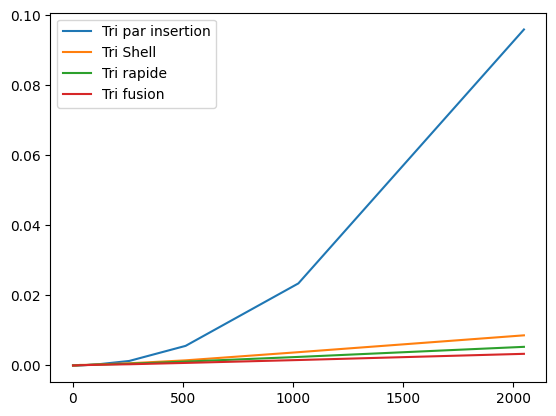

In [39]:
plot_perf(12,10)

# Exo 7

In [37]:
a = np.random.randint(1,10,(4,4))

In [39]:
a.sum(0).

array([13, 23, 19, 21])

In [40]:
def find_magic_square(n):
    for perm in itertools.permutations(range(1,(n**2)+1)):
        square = np.array(perm).reshape(n,n)
        col = square.sum(0)
        lig = square.sum(1)
        val = col[0]
        if (col == val).all() and (lig == val).all():
            print("Carré magique !!!")
            print(square)
            print()
            break

In [41]:
find_magic_square(3)

Carré magique !!!
[[1 5 9]
 [6 7 2]
 [8 3 4]]

